In [1]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models

In [2]:
f = open("images/sino3.txt", 'r')
line = f.read()
print(line)
f.close

   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	   0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	  -0.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+00	   1.0000000e+

<function TextIOWrapper.close()>

In [3]:
import numpy as np
metal3_img = np.zeros((256,360))
k = 0
l = 0
for i, j in enumerate(line):
    if j == '\t':
        metal3_img[k,l] = float(line[i-14:i])
        k = k+1
        if k == 256:
            k = 0
            l = l+1

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

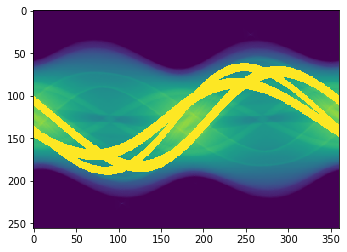

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np

plt.imshow(metal3_img)
plt.colorbar

In [5]:
metal3_img.shape

(256, 360)

In [6]:
result_img = metal3_img
window_size = 3

k = 0
z = 0

for i in range(256-window_size):
    for j in range(360-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] == 300:
                    z = 0
                else:
                    if result_img[i+window_size,j] == 0:
                        z = 0
                    else:
                        k = k+1
train_data = np.zeros((k,window_size,window_size,1))
result_data = np.zeros((k,1))

In [7]:
model = models.Sequential()
model.add(layers.Conv2D(32, (1, 1), activation='relu', input_shape=(3, 3, 1)))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.MaxPooling2D((1, 1)))
model.add(layers.Conv2D(64, (1, 1), activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(300, activation='softmax'))
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 3, 3, 32)          64        
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 3, 3, 64)          2112      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 3, 3, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 64)          4160      
_________________________________________________________________
flatten (Flatten)            (None, 576)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                3

In [12]:
a = [0,1,2,3,4]
a[0:3]

[0, 1, 2]

In [13]:
k = 0

for i in range(256-window_size):
    for j in range(360-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] == 300:
                    z = 0
                else:
                    if result_img[i+window_size,j] == 0:
                        z = 0
                    else:
                        for v in range(window_size):
                            for w in range(window_size):
                                train_data[k,w,v,0] = result_img[i+w,j+v]
                        result_data[k,0] = int(result_img[i+window_size,j])
                        k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=1000)

(56108, 3, 3, 1)
(56108, 1)
Epoch 1/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 4.2413 - accuracy: 0.2522
Epoch 2/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 3.7329 - accuracy: 0.2627
Epoch 3/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 3.4577 - accuracy: 0.2713
Epoch 4/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 3.2652 - accuracy: 0.2780
Epoch 5/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 3.1303 - accuracy: 0.2822
Epoch 6/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 3.0839 - accuracy: 0.2849
Epoch 7/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 2.9761 - accuracy: 0.2891
Epoch 8/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 2.9738 - accuracy: 0.2900
Epoch 9/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 2.8505 - accuracy: 0.2968
Epoch 10/1000
1754/1754 [===========

1754/1754 [==============================] - 2s 1ms/step - loss: 1.8023 - accuracy: 0.4015
Epoch 156/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 1.8019 - accuracy: 0.4001
Epoch 157/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 1.7949 - accuracy: 0.4044
Epoch 158/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 1.7963 - accuracy: 0.4018
Epoch 159/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 1.7945 - accuracy: 0.4040
Epoch 160/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 1.7953 - accuracy: 0.4030
Epoch 161/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 1.7920 - accuracy: 0.4037
Epoch 162/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 1.7892 - accuracy: 0.4041
Epoch 163/1000
1754/1754 [==============================] - 3s 1ms/step - loss: 1.7830 - accuracy: 0.4035
Epoch 164/1000
1754/1754 [==============================] - 2

1754/1754 [==============================] - 2s 1ms/step - loss: 1.6785 - accuracy: 0.4251
Epoch 310/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 1.6814 - accuracy: 0.4264
Epoch 311/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 1.6739 - accuracy: 0.4254
Epoch 312/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 1.6781 - accuracy: 0.4236
Epoch 313/1000
1754/1754 [==============================] - 3s 2ms/step - loss: 1.6744 - accuracy: 0.4272
Epoch 314/1000
1754/1754 [==============================] - 3s 2ms/step - loss: 1.6728 - accuracy: 0.4260
Epoch 315/1000
1754/1754 [==============================] - 3s 1ms/step - loss: 1.6807 - accuracy: 0.4243
Epoch 316/1000
1754/1754 [==============================] - 3s 1ms/step - loss: 1.6650 - accuracy: 0.4271
Epoch 317/1000
1754/1754 [==============================] - 3s 2ms/step - loss: 1.6876 - accuracy: 0.4232
Epoch 318/1000
1754/1754 [==============================] - 3

1754/1754 [==============================] - 3s 1ms/step - loss: 1.6336 - accuracy: 0.4369
Epoch 464/1000
1754/1754 [==============================] - 3s 2ms/step - loss: 1.6359 - accuracy: 0.4339
Epoch 465/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 1.6396 - accuracy: 0.4342
Epoch 466/1000
1754/1754 [==============================] - 3s 2ms/step - loss: 1.6265 - accuracy: 0.4354
Epoch 467/1000
1754/1754 [==============================] - 2s 1ms/step - loss: 1.6418 - accuracy: 0.4381
Epoch 468/1000
1754/1754 [==============================] - 3s 2ms/step - loss: 1.6328 - accuracy: 0.4336
Epoch 469/1000
1754/1754 [==============================] - 3s 2ms/step - loss: 1.6393 - accuracy: 0.4328
Epoch 470/1000
1754/1754 [==============================] - 3s 1ms/step - loss: 1.6137 - accuracy: 0.4348
Epoch 471/1000
1754/1754 [==============================] - 3s 1ms/step - loss: 1.6244 - accuracy: 0.4359
Epoch 472/1000
1754/1754 [==============================] - 3

1754/1754 [==============================] - 3s 2ms/step - loss: 1.5982 - accuracy: 0.4415
Epoch 618/1000
1754/1754 [==============================] - 3s 2ms/step - loss: 1.6059 - accuracy: 0.4407
Epoch 619/1000
1754/1754 [==============================] - 3s 2ms/step - loss: 1.5976 - accuracy: 0.4445
Epoch 620/1000
1754/1754 [==============================] - 3s 2ms/step - loss: 1.6159 - accuracy: 0.4382
Epoch 621/1000
1754/1754 [==============================] - 3s 2ms/step - loss: 1.6229 - accuracy: 0.4410
Epoch 622/1000
1754/1754 [==============================] - 3s 1ms/step - loss: 1.5942 - accuracy: 0.4449
Epoch 623/1000
1754/1754 [==============================] - 3s 1ms/step - loss: 1.5945 - accuracy: 0.4444
Epoch 624/1000
1754/1754 [==============================] - 3s 1ms/step - loss: 1.6014 - accuracy: 0.4431
Epoch 625/1000
1754/1754 [==============================] - 3s 1ms/step - loss: 1.6056 - accuracy: 0.4399
Epoch 626/1000
1754/1754 [==============================] - 3

1754/1754 [==============================] - 3s 2ms/step - loss: 1.5593 - accuracy: 0.4496
Epoch 772/1000
1754/1754 [==============================] - 3s 2ms/step - loss: 1.5523 - accuracy: 0.4535
Epoch 773/1000
1754/1754 [==============================] - 3s 2ms/step - loss: 1.6080 - accuracy: 0.4490
Epoch 774/1000
1754/1754 [==============================] - 3s 2ms/step - loss: 1.5472 - accuracy: 0.4552
Epoch 775/1000
1754/1754 [==============================] - 3s 2ms/step - loss: 1.5923 - accuracy: 0.4497
Epoch 776/1000
1754/1754 [==============================] - 3s 1ms/step - loss: 1.5512 - accuracy: 0.4522
Epoch 777/1000
1754/1754 [==============================] - 3s 1ms/step - loss: 1.5679 - accuracy: 0.4505
Epoch 778/1000
1754/1754 [==============================] - 3s 1ms/step - loss: 1.5456 - accuracy: 0.4545
Epoch 779/1000
1754/1754 [==============================] - 3s 2ms/step - loss: 1.5425 - accuracy: 0.4559
Epoch 780/1000
1754/1754 [==============================] - 3

1754/1754 [==============================] - 3s 1ms/step - loss: 1.5149 - accuracy: 0.4606
Epoch 926/1000
1754/1754 [==============================] - 3s 1ms/step - loss: 1.5089 - accuracy: 0.4628
Epoch 927/1000
1754/1754 [==============================] - 3s 1ms/step - loss: 1.5159 - accuracy: 0.4608
Epoch 928/1000
1754/1754 [==============================] - 3s 2ms/step - loss: 1.5237 - accuracy: 0.4560
Epoch 929/1000
1754/1754 [==============================] - 3s 2ms/step - loss: 1.5153 - accuracy: 0.4621
Epoch 930/1000
1754/1754 [==============================] - 3s 1ms/step - loss: 1.5169 - accuracy: 0.4601
Epoch 931/1000
1754/1754 [==============================] - 3s 1ms/step - loss: 1.5101 - accuracy: 0.4628
Epoch 932/1000
1754/1754 [==============================] - 3s 1ms/step - loss: 1.5156 - accuracy: 0.4598
Epoch 933/1000
1754/1754 [==============================] - 3s 2ms/step - loss: 1.5149 - accuracy: 0.4602
Epoch 934/1000
1754/1754 [==============================] - 3

In [14]:
for i in range(256-window_size):
    for j in range(360-window_size):
        if 300 in result_img[i:i+window_size, j:j+window_size]:
            z = 0
        else:
            if result_img[i+window_size,j] == 300:
                test_data = np.zeros((1,window_size,window_size,1))
                for v in range(window_size):
                    for w in range(window_size):
                        test_data[0,w,v,0] = result_img[i+w,j+v]
                prediction = model.predict(test_data)
                result_img[i+window_size,j] = np.where(prediction[0]==max(prediction[0]))[0][0]

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

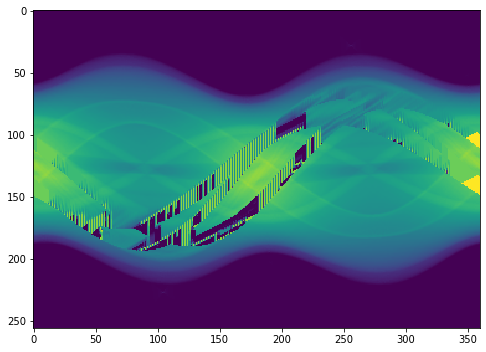

In [20]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:360])
plt.colorbar

In [ ]:
# plt.imshow(result_img)
# plt.colorbar
# plt.axis('off'), plt.xticks([]), plt.yticks([])
# plt.tight_layout()
# plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
# plt.savefig('images/RCNN3(100)_test.png', bbox_inches = 'tight', pad_inches=0, dpi=100)

In [ ]:
# np.savetxt('images/CNN_Metal3_3by3_txt.txt', result_img)

In [8]:
k = 0

for i in range(256-window_size):
    for j in range(360-window_size):
        if 0 in result_img[i:i+window_size,j:j+window_size]:
            z=0
        else:
            if 300 in result_img[i:i+window_size,j:j+window_size]:
                z = 0
            else:
                if result_img[i+window_size,j] == 300:
                    z = 0
                else:
                    if result_img[i+window_size,j] == 0:
                        z = 0
                    else:
                        for v in range(window_size):
                            for w in range(window_size):
                                train_data[k,w,v,0] = result_img[i+w,j+v]
                        result_data[k,0] = int(result_img[i+window_size,j])
                        k = k+1
print(train_data.shape)
print(result_data.shape)

model.fit(train_data, result_data, epochs=10)

(56108, 3, 3, 1)
(56108, 1)
Epoch 1/10
1754/1754 [==============================] - 2s 1ms/step - loss: 4.2920 - accuracy: 0.2494
Epoch 2/10
1754/1754 [==============================] - 2s 1ms/step - loss: 3.9329 - accuracy: 0.2579
Epoch 3/10
1754/1754 [==============================] - 2s 1ms/step - loss: 3.6990 - accuracy: 0.2621
Epoch 4/10
1754/1754 [==============================] - 2s 1ms/step - loss: 3.4660 - accuracy: 0.2699
Epoch 5/10
1754/1754 [==============================] - 2s 1ms/step - loss: 3.3263 - accuracy: 0.2745
Epoch 6/10
1754/1754 [==============================] - 2s 1ms/step - loss: 3.1995 - accuracy: 0.2786
Epoch 7/10
1754/1754 [==============================] - 3s 1ms/step - loss: 3.1027 - accuracy: 0.2843
Epoch 8/10
1754/1754 [==============================] - 3s 2ms/step - loss: 3.0312 - accuracy: 0.2872
Epoch 9/10
1754/1754 [==============================] - 3s 2ms/step - loss: 2.9832 - accuracy: 0.2906
Epoch 10/10
1754/1754 [==============================]

In [9]:
for i in range(256-window_size):
    for j in range(360-window_size):
        if 300 in result_img[i:i+window_size, j:j+window_size]:
            z = 0
        else:
            if result_img[i+window_size,j] == 300:
                test_data = np.zeros((1,window_size,window_size,1))
                for v in range(window_size):
                    for w in range(window_size):
                        test_data[0,w,v,0] = result_img[i+w,j+v]
                prediction = model.predict(test_data)
                result_img[i+window_size,j] = np.where(prediction[0]==max(prediction[0]))[0][0]

<function matplotlib.pyplot.colorbar(mappable=None, cax=None, ax=None, **kw)>

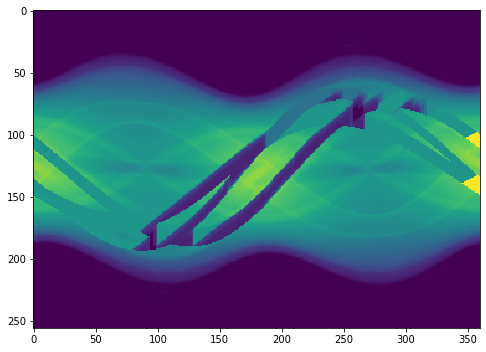

In [10]:
plt.figure(figsize=(8,12))
plt.imshow(result_img[:,0:360])
plt.colorbar